In [52]:
import sys
import tweepy
sys.path.insert(1, '../../')
import keys
from datetime import datetime
import nltk
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from unidecode import unidecode
import os
import re

%matplotlib inline

In [53]:
#api conf
auth = tweepy.OAuthHandler(keys.cos_pub, keys.cos_sec)
auth.set_access_token(keys.as_pub, keys.as_sec)

api = tweepy.API(auth)
data_folder = '../data/'

In [54]:
#getting data
#TODO criar um gerador de termos de pesquisa
search_terms = ["notebook", 'celular', 'câmera', 'iphone', 'câmera', 'smartwatsh', 'memória', 'ventilador', 'aplicativo']
def twitter_search(terms):
    tmp_search_result = []
 
    for e in search_terms:
        partial_result = [];
        api_result = api.search(q=e, tweet_mode='extended', count=100, lang='pt', retweeted=False, reply=False)

        for prop in api_result:
            partial_result.append(prop._json['full_text'])
        tmp_search_result.extend(partial_result)
        
    return tmp_search_result
search_result = twitter_search(search_terms)
search_result

['trazendo o notebook pro BANHEIRO enquanto tomo banho pq preciso tomar banho pra ir beber e comemorar e não quero perder a cena de lyla saindo da jaula',
 'hillary ta dando banho no notebook\n\n??????????????????',
 'RT @portalblackpink: [MUTIRÃO] Menos de 3 HORAS até nosso mutirão para DDU-DU DDU-DU começar! Quanto mais dispositivos você tiver em casa,…',
 '@thalesLeite Cê lembra aquele notebook que eu tinha no IF? Então, ainda tenho ele. Core i5 de 2010 da Asus. Vivinho',
 'Meu coração doeu 😢 Alguém dá um notebook, ou celular com internet ilimitada pra ele gente! 😭 https://t.co/N7NcxheT5l',
 "Notebook Odyssey Intel Core 7 I5 8GB (GeForce GTX 1050 com 4GB) 1TB Led Full Hd 15.6'' W10 Preto - Samsung\n&gt;&gt;&gt; R$ 3.599 em 18x s/juros no cartão submarino pagando com AME, receba de volta 28% do valor, totalizando R$ 2.599 na diferença\n&gt;&gt;&gt; https://t.co/LrnTxPSHON https://t.co/GHFrWAE2rm",
 'Notebook Dell Gaming G5-5590-A10P 9ª Intel Core I5 8GB Tela 15,6" (Geforce GTX1650 co

In [55]:
#saving data in a txt file
c_work = 'test'

data_path = '{0}{1}{2}/'.format(data_folder,c_work, datetime.now(tz=None))
graphics_path = data_path +'graphics/' 
separator = ' \n || \n '

os.makedirs(graphics_path)

#raw file
with open(data_path+'raw.txt', 'wb') as file:
    for e in search_result:
        entry = '{0}{1}'.format(e.splitlines(), separator) #tweet separator
        file.write(entry.encode())
    file.close()
    
#search terms
with open(data_path+'search_terms.txt', 'wb') as file:
    entry = ' '.join(search_terms)
    file.write(entry.encode())
    file.close()
    
with open(data_path+'raw_separator.txt', 'wb') as file:
    file.write(separator.encode())
    file.close()

In [63]:
#filtrando texto
def filter_text(s_result):
    # juntando todas as sentenças e removendo \n
    text = ''.join(''.join(s_result).splitlines())
    text = unidecode(text)
    nltk.download('stopwords')
    stop_words = nltk.corpus.stopwords.words('portuguese')
    stop_words.extend(['', 'rt']) #tirando espaços vazios e marcas de retweet
    
    w_list = []
    w_list = text.split()
    w_list = [e.strip().strip(string.punctuation).lower() for e in w_list]
    w_list = [e for e in words_list if "https" not in e and e[0] !=  '@'] #tirando  links e menções  
    
    w_filtered = ' '.join(w_list)
    
    #removendo caracteres não alfanuméricos de dentro da string e stop_words
    w_list = [e for e in re.sub('[^A-Za-z0-9]+', ' ', w_filtered).split(' ') if e not in stop_words ]
    
    w_list = filtered_words.split(' ') #atualilzando lista de palavras

    return {
        'text': w_filtered,
        'list': w_list
    }
text = filter_text(search_result)

words_list = text['list']
filtered_words = text['text']

print('List:\n{0}\n\nWords:'.format(words_list[:40]))
print(filtered_words[:200])

List:
['samsungbrasil', 'n', 'entrada', 'pra', 'cartao', 'n', 'entendo', 'bem', 'n', 'pra', 'ajudar', 'pouco', 'nisso', 'faco', 'pra', 'adquirir', 'especifico', 'pra', 'notebook', 'to', 'enganada', 'real', 'kkkkkkkkkkkkk', 'rafaelamarquesv', 'aaaaah', 'to', 'quase', 'chorando', 'cara', 'hora', 'q', 'finalizar', 'compra', 'notebook', 'reinicioudps', 'tentar', 'comprar', 'nv', 'ja', 'acabado']

Words:
samsungbrasil n entrada pra cartao n entendo bem n pra ajudar pouco nisso faco pra adquirir especifico pra notebook to enganada real kkkkkkkkkkkkk rafaelamarquesv aaaaah to quase chorando cara hora q 


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/albrigs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
#termos mais frequentes
frequence_list= []
frequence_list = Counter(words_list)

frequence_list.most_common(20)

[('camera', 179),
 ('nao', 172),
 ('pra', 142),
 ('rt', 132),
 ('celular', 127),
 ('memoria', 100),
 ('iphone', 100),
 ('notebook', 97),
 ('aplicativo', 93),
 ('voce', 89),
 ('so', 83),
 ('ventilador', 80),
 ('ver', 76),
 ('ja', 61),
 ('ta', 60),
 ('q', 55),
 ('to', 50),
 ('ano', 47),
 ('5', 44),
 ('todos', 42)]

In [65]:
word_cloud = WordCloud(max_font_size=50).generate(filtered_words)

with open(data_path+'filtered.txt', "wb") as file:
    file.write(filtered_words.encode())
    file.close()

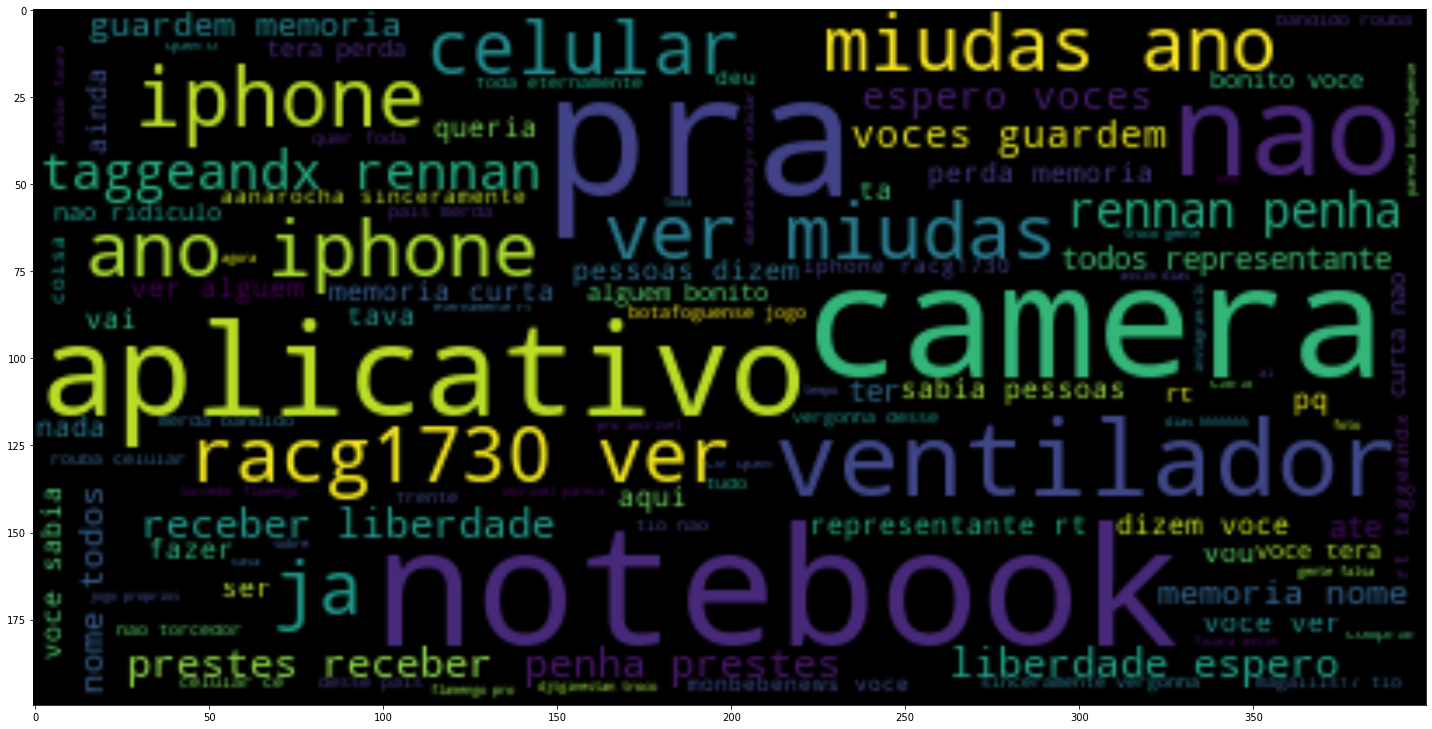

In [66]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(word_cloud, interpolation='bilinear')
plt.axis(label= 'Nearest')
plt.tight_layout()
plt.savefig(graphics_path+'w_c_near.png', dpi=90)
plt.show()

In [67]:
#algoritmo que mostra vizinhos
expression = "ventilador"

positions = [] #localização onde a plavra se encontra
for i, e in enumerate(words_list):
    if expression == e:
        positions.append(i)

print(len(positions))
print(positions)

80
[7364, 7373, 7384, 7417, 7435, 7461, 7467, 7472, 7481, 7508, 7533, 7535, 7556, 7562, 7566, 7580, 7586, 7601, 7608, 7615, 7640, 7650, 7658, 7663, 7677, 7700, 7706, 7715, 7724, 7735, 7746, 7760, 7768, 7778, 7803, 7807, 7818, 7825, 7829, 7836, 7850, 7854, 7863, 7883, 7894, 7900, 7911, 7948, 7951, 7972, 8007, 8017, 8032, 8034, 8052, 8059, 8074, 8084, 8097, 8102, 8114, 8120, 8135, 8142, 8145, 8167, 8185, 8213, 8245, 8261, 8268, 8276, 8308, 8323, 8327, 8336, 8345, 8348, 8359, 8363]


In [68]:
neighbors = 2
for e in positions[0:30]:
    print(words_list[e-neighbors : e+neighbors+1])

['momento', 'estudando', 'ventilador', 'ligado', 'forma']
['banho', 'liguei', 'ventilador', 'ar', 'so']
['deu', 'pauhoje', 'ventilador', 'caiu', 'quebrouo']
['pra', 'colocar', 'ventilador', 'van', 'pra']
['jogar', 'merda', 'ventilador', 'tudo', 'querem']
['dormindo', 'aproveitando', 'ventilador', 'miojonin', 'enfia']
['gato', 'buceta', 'ventilador', 'cadeira', 'wtf']
['normanlizandu', 'miojonin', 'ventilador', 'rt', 'dalva0806']
['jogou', 'merda', 'ventilador', 'compartilhe', 'pra']
['soldado', 'merda', 'ventilador', 'ai', 'ia']
['jogando', 'dinheiro', 'ventilador', 'colocar', 'ventilador']
['ventilador', 'colocar', 'ventilador', 'pra', 'ficar']
['moradores', 'n', 'ventilador', 'casa', 'assim']
['aguentando', 'ventiladoralto', 'ventilador', 'boa', 'pra']
['pra', 'deitar', 'ventilador', 'maximo', 'nao']
['ligar', 'ar', 'ventilador', 'ja', 'pobre']
['piorar', 'quebrei', 'ventilador', 'nesse', 'calor']
['pelado', 'frente', 'ventilador', 'trancado', 'quarto']
['hahahahahaha', 'ese', 'venti